# 机器学习作业模板
- 姓名：边笛
- 学号：2012668
- 专业：计算机科学与技术

### 实验要求
题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

**截止日期：10月7日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

### 导入数据集 semesion

In [2]:
# 导入数据
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256)) #l*256
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float64(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [3]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)

((1593, 256), (1593, 1))

### 基本要求
编程实现kNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（模板中采用的是普通方法分割训练集和测试集，作业中需要用留一法）

In [4]:
# KNN算法手动实现
def MyKnnClassifier(data_X, data_y, neighbors):
    # 生成数据集和测试集
    loo = LeaveOneOut()
    
    testS = 0
    acc = 0
    for train_index,test_index in loo.split(X,y):
        X_train=X[train_index]
        X_test=X[test_index]
        y_train=y[train_index]
        y_test=y[test_index]
        trainShape = X_train.shape[0]   # 获得训练集的大小
        testShape = X_test.shape[0]     # 获得测试集的大小
        testS += testShape
        testRes = []  # 存放测试结果
        for i in range(testShape):  # 针对测试集中每一个样本进行预测
            # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
            testDiffMat = np.tile(X_test[i],(trainShape , 1)) - X_train
            sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
            # 方差距离为方差矩阵的整行求和，是一个一位列向量
            sqTestDiffDis = sqTestDiffMat.sum(axis=1)
            testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
            sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
            labelCount = []
            for j in range(neighbors):  # 考察k近邻属于哪些类
                labelCount.append(y_train[sortIndex[j]][0])
            classifyRes = Counter(labelCount)    # 把k近邻中最多的那个标签作为分类结果
            classifyRes = classifyRes.most_common(2)[0][0]
            testRes.append(classifyRes)
            if classifyRes == y_test[i]:  # 分类正确则将accRate+1
                acc+=1
    accRate = acc / testS
    print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(neighbors,testS,acc,accRate))        
    return accRate

实验结果：

In [5]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356


0.9152542372881356

In [6]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356


0.9152542372881356

### 中级要求
模板中与sklearn机器学习包中的kNN分类结果进行对比（作业中需要与weka机器学习包中的kNN分类结果进行对比）

 **实验结果源于 weka 应用的测试结果：**  
 **利用 weka 测试了 k = range(1,30) 情况下的准确率,并记录在scores2中**  
 **在此处具体展示k=1、3、5时的测试结果**
> |                  |      K = 1     |      K = 3      |       K = 5       |
|:--------------------------------:|:--------------:|:---------------:|:----------------:|
|        Correlation coefficient     | 0.8929 | 0.908 | 0.9071 | 
|        Mean absolute error        |  0.3427  |  0.4617  |   0.5423  |  
|       Root mean squared error      |     1.33     |       1.2351    |     1.2528      |    
|       Relative absolute error      |     13.7195%    |      18.4796%    |      21.7076%       | 
|      Root relative squared error     |     46.3106%     |      43.0045%     |      43.6197%      | 
|     Total Number of Instances    |      1593      |       1593      |       1593       |

![weka分析结果](weka分析结果.png)

实验结果：

In [7]:
scores2 = [0.8929,0.9082,0.908,0.907,0.9071,0.9081,0.9106,0.9071,0.9048,0.9025,0.9002,0.8985,0.8986,0.8959,0.8919,0.8896,0.8878,0.8865,0.8839,0.8825,0.8815,0.8794,0.8777,0.8752,0.8738,0.8726,0.871,0.8705,0.8698]

### 高级要求
将实验过程结果等图示展出

In [8]:
scores1 = []


for k in range(1,30):
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)
    


k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=2时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=4时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356
k=6时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=7时，测试个数为1593  正确个数为：1469  准确率为：0.9221594475831764
k=8时，测试个数为1593  正确个数为：1472  准确率为：0.9240426867545511
k=9时，测试个数为1593  正确个数为：1471  准确率为：0.9234149403640929
k=10时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=11时，测试个数为1593  正确个数为：1456  准确率为：0.9139987445072191
k=12时，测试个数为1593  正确个数为：1460  准确率为：0.9165097300690521
k=13时，测试个数为1593  正确个数为：1461  准确率为：0.9171374764595104
k=14时，测试个数为1593  正确个数为：1453  准确率为：0.9121155053358443
k=15时，测试个数为1593  正确个数为：1446  准确率为：0.9077212806026366
k=16时，测试个数为1593  正确个数为：1446  准确率为：0.9077212806026366
k=17时，测试个数为1593  正确个数为：1442  准确率为：0.9052102950408035
k=18时，测试个数为1593  正确个数为：1438  准确率为：0.9026993094789705
k=19时，测试个数为1593  正确个数为：1436  准确率为：0.901443816698054
k=2

对图表的一些文字说明...

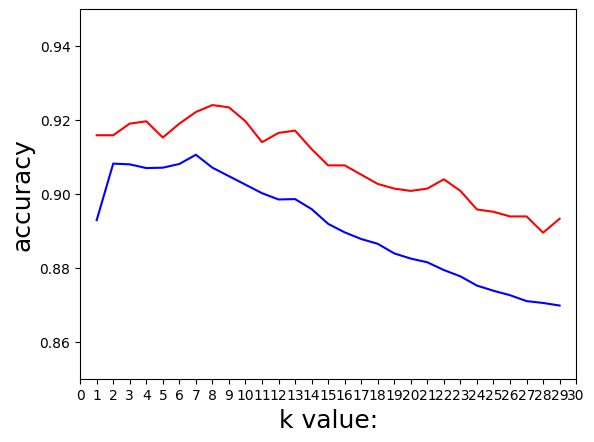

In [9]:
    plt.xlabel('k value:',fontsize=18)
    plt.ylabel('accuracy',fontsize=18)
    x_major_locator = plt.MultipleLocator(1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    plt.xlim(0, 30)
    plt.ylim(0.85, 0.95)
    # 普通kNN分类精度
    plt.plot(range(1,30),scores1,'r')
    plt.plot(range(1,30),scores2,'b')
    plt.show()